Text(0,0.5,'probability density function')

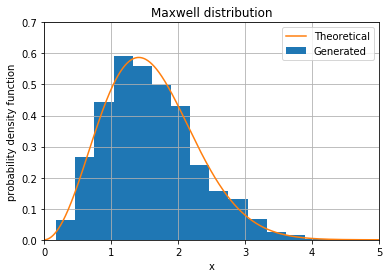

In [104]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# 1. Выберите ваше любимое непрерывное распределение
# 2. Сгенерируйте из него выборку объёма 1000, 
# 3. постройте гистограмму выборки и нарисуйте поверх неё 
# 4. теоретическую плотность распределения вашей случайной величины 
# (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

# 1. любая функция из библиотеки scipy.stats
# буду работать с распределением Максвелла scipy.stats.maxwell
distribution_maxwell = stats.maxwell()

# 2. сгенерируем 1000 значений
distribution_maxwell_generated = distribution_maxwell.rvs(1000)

# 3. гистограмма для сгенерированной выборки
plt.hist(distribution_maxwell_generated, normed=True, bins=15, label='Generated')

# 4. теоретическая плотность распределения - pdf (probability density function)
x = np.linspace(0,5,1000)
distribution_maxwell_theoretical = distribution_maxwell.pdf(x)
plt.plot(x, distribution_maxwell_theoretical, label='Theoretical')
plt.legend()
plt.grid()
plt.axis([0, 5, 0, 0.7])
plt.title('Maxwell distribution')
plt.xlabel('x')
plt.ylabel('probability density function')

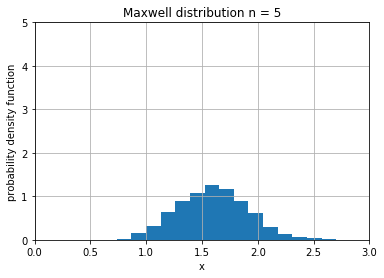

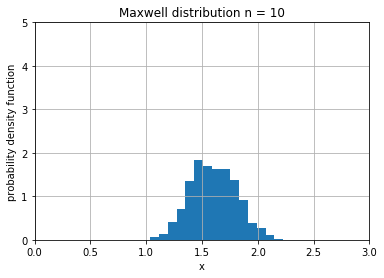

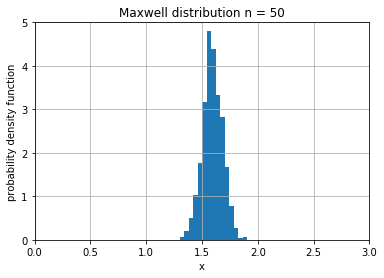

In [68]:
# 5. оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. 
# Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n 
selection_number = 1000
selection_volume = [5, 10, 50]

## матрица для выборочного среднего значение
distribution_matrix = np.zeros((len(selection_volume), selection_number))
for i in xrange(len(selection_volume)):
    for j in xrange(selection_number):
        # генирируем выборку по объему
        distribution = np.array(stats.maxwell.rvs(size=selection_volume[i]))
        # записываем среднее значение распределения в матрицу
        distribution_matrix[i, j] = distribution.mean()

# 6. и постройте гистограммы распределений их выборочных средних
# количество выборок
for i in xrange(len(selection_volume)):
    plt.hist(distribution_matrix[i], bins=15, normed=True)
    plt.grid()
    plt.axis([0, 3, 0, 5])
    plt.title('Maxwell distribution n = ' + str(selection_volume[i]))
    plt.xlabel('x')
    plt.ylabel('probability density function')
    plt.show()

In [100]:
# 7. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), 
# посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, 
# приближается распределение выборочных средних
distribution_selection_mean = stats.maxwell().stats(moments='m')
print ('E = ' + str(distribution_selection_mean))
distribution_selection_variance = np.zeros( len(sampleVolume) )
for i in xrange(len(selection_volume) ):
    distribution_selection_variance[i] = stats.maxwell().stats(moments='v') / selection_volume[i]
    print 'D(n=' + str(selection_volume[i]) + ') = ' + str(distribution_selection_variance[i])

E = 1.5957691216057308
D(n=5) = 0.0907041821059349
D(n=10) = 0.04535209105296745
D(n=50) = 0.009070418210593489


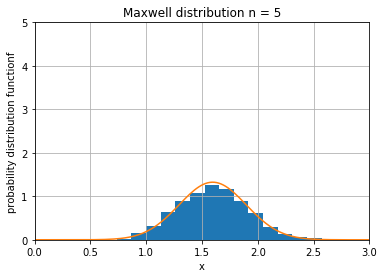

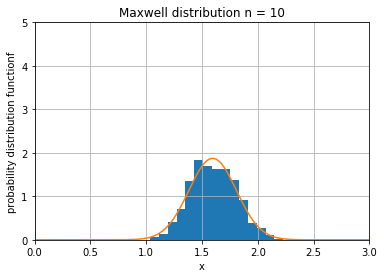

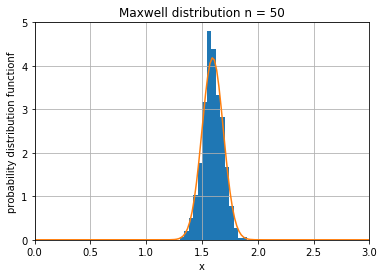

In [109]:
# 8.  Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения 
for i in xrange(len(selection_volume)):
    plt.hist(distribution_matrix[i], bins=15, normed=True)
    plt.grid()
    plt.axis([0, 3, 0, 5])
    plt.title('Maxwell distribution n = ' + str(selection_volume[i]))
    plt.xlabel('x')
    plt.ylabel('probability distribution functionf')
    
    # зададим нормально распределенную случайную величину
    mu = distribution_selection_mean
    sigma = sqrt(distribution_selection_variance[i])
    normRv = stats.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()

# Вывод:

Распределение выборочных средних для распределения Максвелла можно хорошо описать нормальным распределением (ЦПТ работает), из построенных графиков видно, чем больше n (объем выборки), тем точнее аппроксимация.